# Broadcasting

> Broadcasting is simply a set of rules for applying binary ufunctions on array of different sizes.

In [1]:
import numpy as np

In [2]:
np.random.seed(1)
a = np.random.randint(0, 9, 3)
b = np.random.randint(0, 9, 3)
a, b

(array([5, 8, 5], dtype=int32), array([0, 0, 1], dtype=int32))

In [3]:
a + b  # 直接將2個array相加

array([5, 8, 6], dtype=int32)

In [4]:
# 可以跟一個純量相加
a + 5

array([10, 13, 10], dtype=int32)

In [5]:
arr = np.ones((3, 3))
arr

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
arr + a  # 同一個Size可以相加

array([[6., 9., 6.],
       [6., 9., 6.],
       [6., 9., 6.]])

In [7]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [8]:
c = np.arange(3)[:, None]  # 也可以寫成這樣，但用None的可閱性較低
c

array([[0],
       [1],
       [2]])

In [9]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

※ 可以理解成`[0, 1, 2]`的row * column

In [10]:
arr = np.ones((2, 3))
a = np.arange(3)
arr, a

(array([[1., 1., 1.],
        [1., 1., 1.]]),
 array([0, 1, 2]))

In [11]:
arr.shape, a.shape

((2, 3), (3,))

In [12]:
arr + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [13]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a, b

(array([[0],
        [1],
        [2]]),
 array([0, 1, 2]))

In [14]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## 擴展維度

In [15]:
arr = np.ones((3, 2))
a = np.arange(3)
arr, a

(array([[1., 1.],
        [1., 1.],
        [1., 1.]]),
 array([0, 1, 2]))

In [16]:
arr + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [17]:
arr + a[:, np.newaxis]  # 透過np.newaxis擴展維度

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [18]:
a[:, np.newaxis], a[:, np.newaxis].shape, arr.shape

(array([[0],
        [1],
        [2]]),
 (3, 1),
 (3, 2))

## Centering an Array

> Data Centering, Mean Removed

主要目的:

1. 改善機器學習的模型性能: 很多演算法，包含PCA, SVM，以及使用梯度下降優化法在處理Mean為0的數據時，表現會較佳，收斂速度也較快。
2. 主成分分析(PCA)的前提: 因為PCA的目標是找到數據方差(Variance)最大的方向。

In [19]:
arr = np.random.random((10 ,3))
arr

array([[0.18626021, 0.34556073, 0.39676747],
       [0.53881673, 0.41919451, 0.6852195 ],
       [0.20445225, 0.87811744, 0.02738759],
       [0.67046751, 0.4173048 , 0.55868983],
       [0.14038694, 0.19810149, 0.80074457],
       [0.96826158, 0.31342418, 0.69232262],
       [0.87638915, 0.89460666, 0.08504421],
       [0.03905478, 0.16983042, 0.8781425 ],
       [0.09834683, 0.42110763, 0.95788953],
       [0.53316528, 0.69187711, 0.31551563]])

In [20]:
arr_mean = arr.mean(axis=0)
arr_mean

array([0.42556013, 0.4749125 , 0.53977235])

In [21]:
arr_centered = arr - arr_mean
arr_centered.mean(axis=0)

array([-2.22044605e-17,  8.88178420e-17,  3.33066907e-17])

## 繪製 Two-Dimensional Function

In [22]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x, y, z

(array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
        0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
        1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
        1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
        2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
        2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
        3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
        3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
        4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
        4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ]),
 array([[0.        ],
        [0.10204082],
        [0.20408163],
        [0.30612245],
        [0.40816327],
        [0.51020408],
        [0.6122449 ],
        [0.71428571],
        [0.81632653],
        [0.91836735],
        [1.02040816],
        [1.12244898],
        [1.2244898 ],
        [1.32653061],
        [1

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

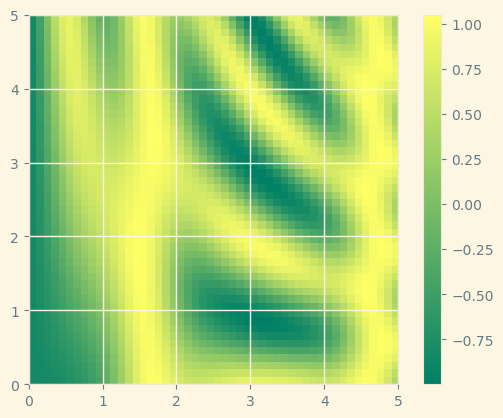

In [24]:
plt.style.use('Solarize_Light2')
plt.imshow(
    z,
    origin='lower',
    extent=[0, 5, 0, 5],
    cmap='summer'
)
plt.colorbar()